## Deuflhard Function

In [15]:
using Pkg
Pkg.activate("../../.")
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging
using CairoMakie
CairoMakie.activate!

  Activating project at `~/globtim`


activate! (generic function with 1 method)

In [18]:
# Constants and Parameters
const n, a, b = 2, 7, 5
const scale_factor = a / b  # maybe it should be a parameter.
f = Deuflhard # Objective function

Deuflhard (generic function with 1 method)

In [1]:
d = 8 # Initial Degree 
SMPL = 60 # Number of samples
center = [0.0, 0.0]
TR = test_input(f,
                dim=n,
                center=[0.0, 0.0],
                GN=SMPL,
                sample_range=scale_factor,
                )
pol_cheb = Constructor(TR, d, basis=:chebyshev)
pol_lege = Constructor(TR, d, basis=:legendre);


UndefVarError: UndefVarError: `n` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [6]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=pol_cheb.normalized,
    power_of_two_denom=pol_cheb.power_of_two_denom
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=pol_lege.normalized)

df_cheb = process_critical_points(real_pts_cheb, f, TR)
df_lege = process_critical_points(real_pts_lege, f, TR)

Dimension m of the vector space: 45
Dimension m of the vector space: 45

=== Starting Critical Points Processing (dimension: 2) ===
Processed 5 points (0.0s)

=== Starting Critical Points Processing (dimension: 2) ===
Processed 13 points (0.0s)


Row,x1,x2,z
,Float64,Float64,Float64
1,-0.618667,0.884567,0.245044
2,-0.884567,0.618667,0.245044
3,0.884567,-0.618667,0.245044
4,7.2446e-16,-2.37599e-15,4.0
5,-0.983094,0.376399,0.132156
6,0.618667,-0.884567,0.245044
7,-0.394832,-0.394832,2.67881
8,0.770386,-0.770386,0.0768416
9,0.376399,-0.983094,0.132156


In [8]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=0.05);
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=0.05);

Processing point 1 of 5
Optimization has converged within bounds: ✓
Processing point 2 of 5
Optimization has converged within bounds: ✓
Processing point 3 of 5
Optimization has converged within bounds: ✓
Processing point 4 of 5
Optimization has converged within bounds: ✓
Processing point 5 of 5
Optimization has converged within bounds: ✓
Processing point 1 of 13
Optimization has converged within bounds: ✓
Processing point 2 of 13
Optimization has converged within bounds: ✓
Processing point 3 of 13
Optimization has converged within bounds: ✓
Processing point 4 of 13
Optimization has converged within bounds: ✓
Processing point 5 of 13
Optimization has converged within bounds: ✓
Processing point 6 of 13
Optimization has converged within bounds: ✓
Processing point 7 of 13
Optimization has converged within bounds: ✓
Processing point 8 of 13
Optimization has converged within bounds: ✓
Processing point 9 of 13
Optimization has converged within bounds: ✓
Processing point 10 of 13
Optimization 

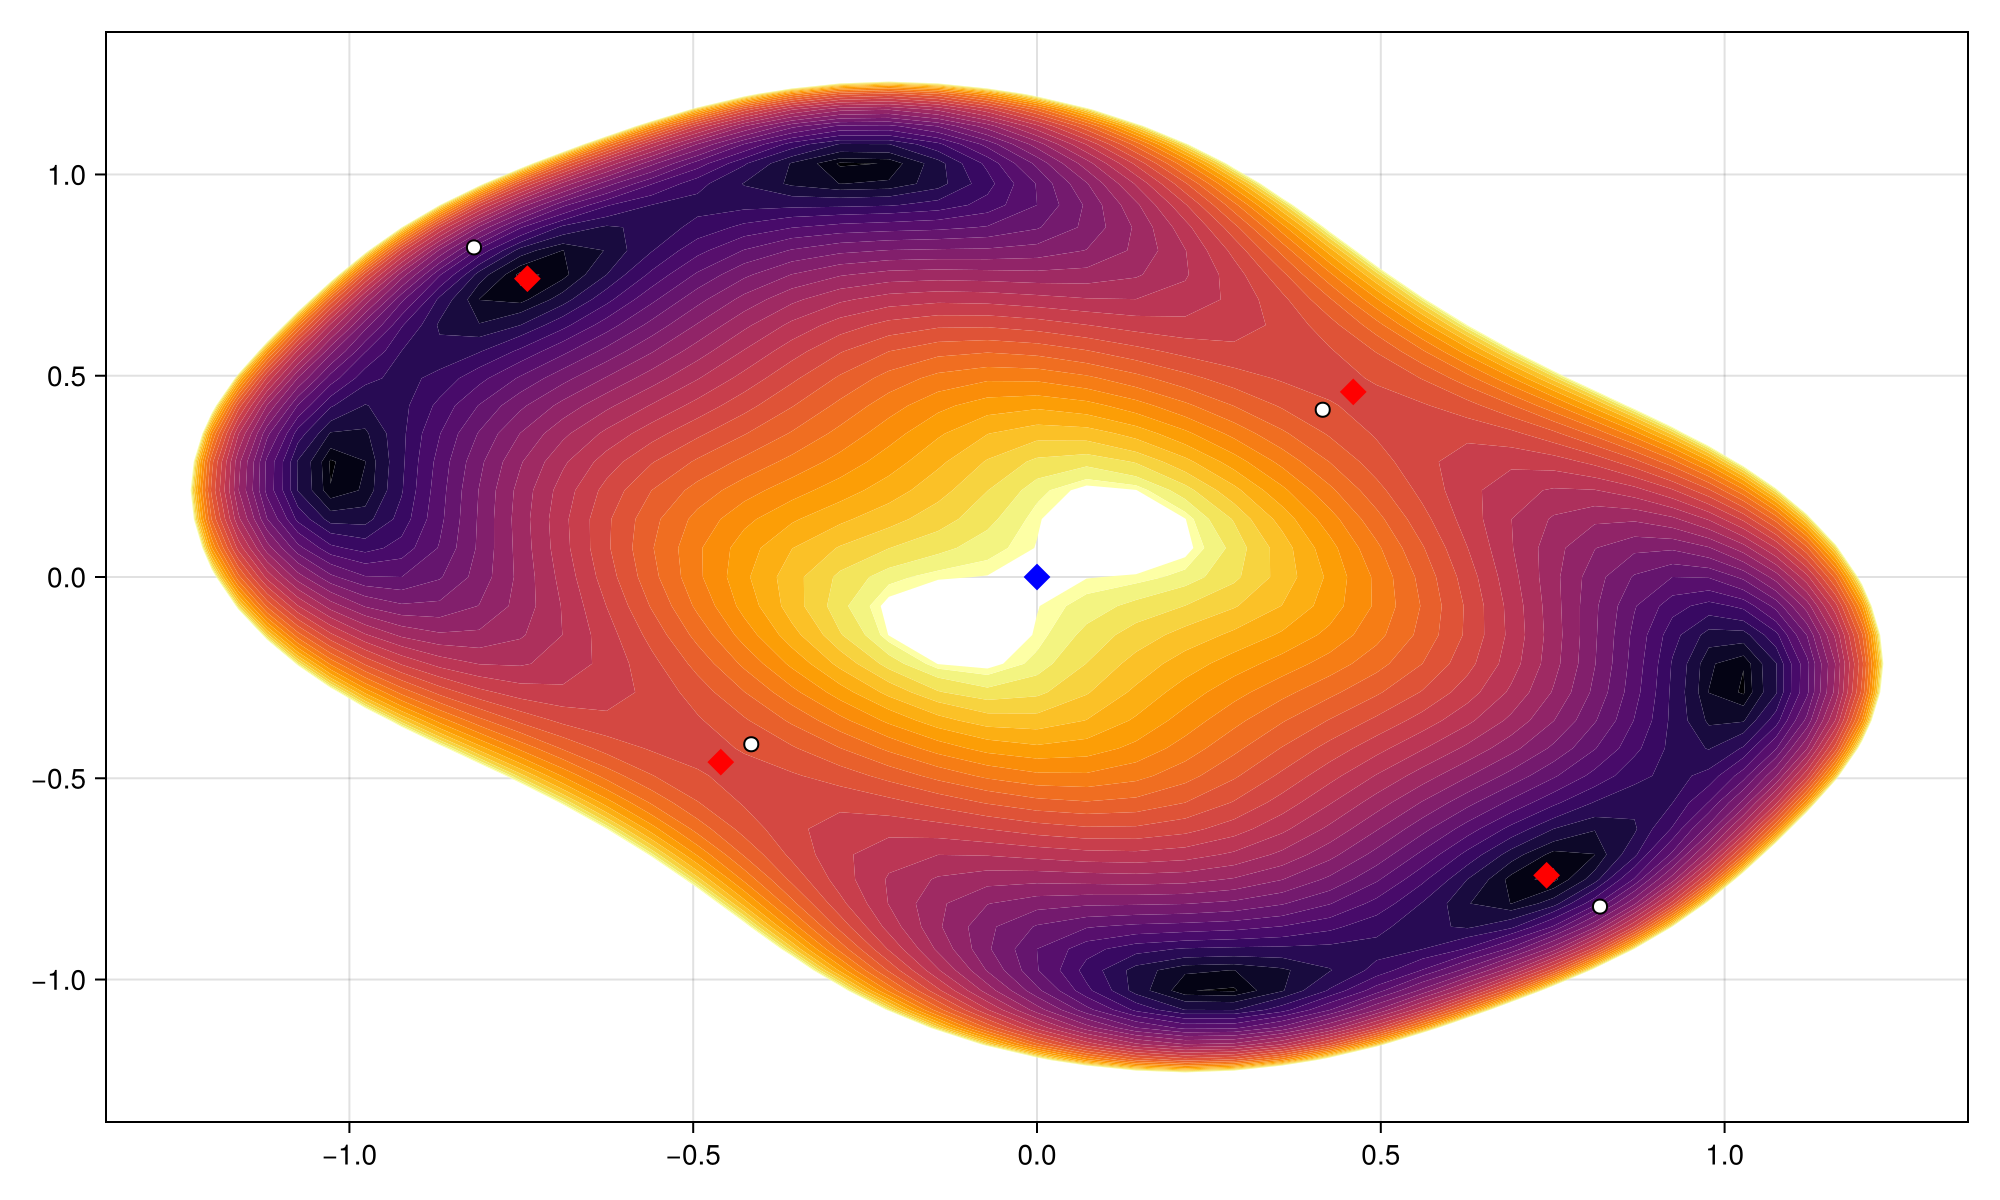

In [20]:
fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true)

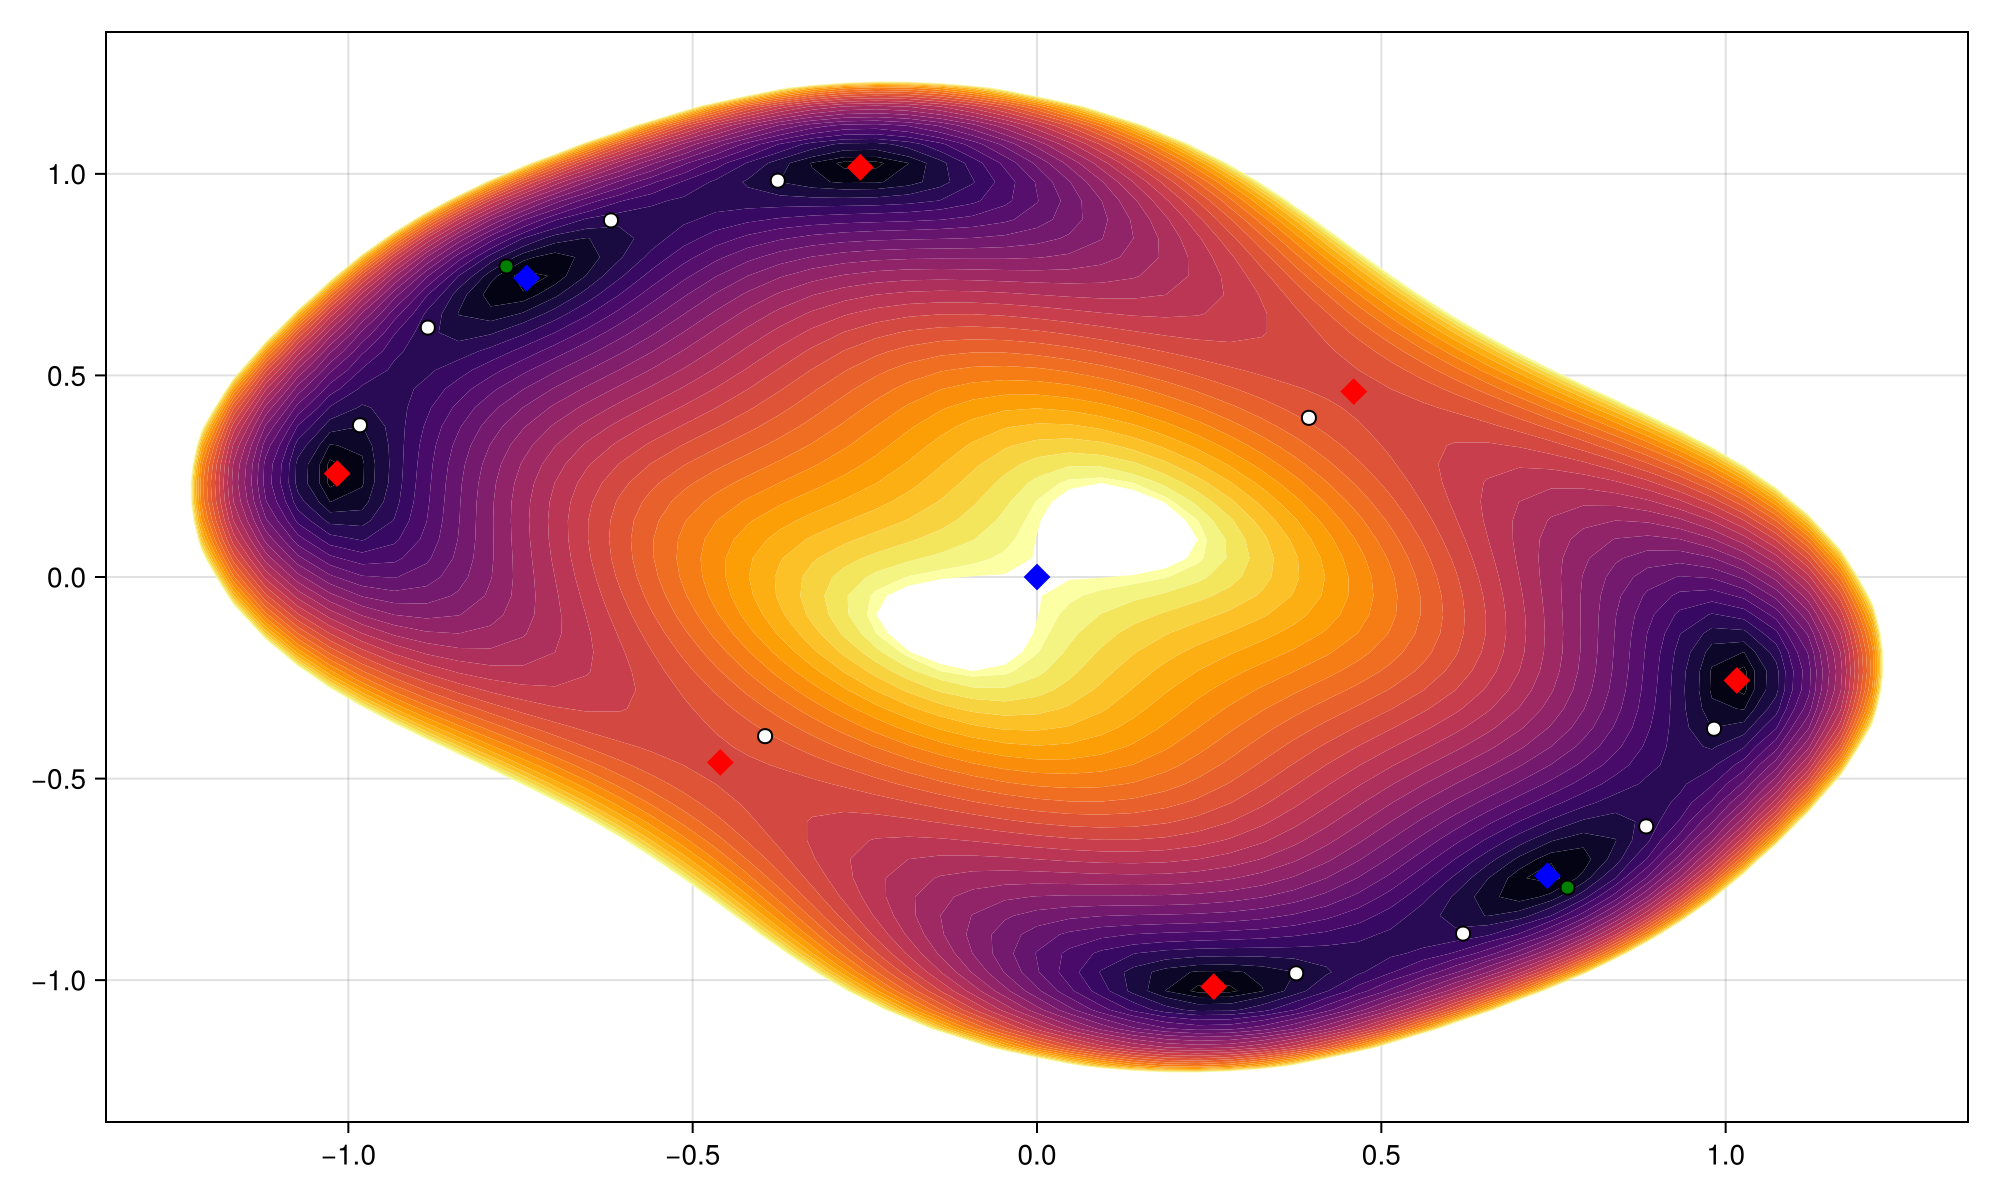

In [21]:
fig_2 = cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=true)

In [9]:
x1_range = range(-1, 1, length=100)
x2_range = range(-1, 1, length=100)
z1 = [f([x1_val, x2_val]) for x1_val in x1_range, x2_val in x2_range];

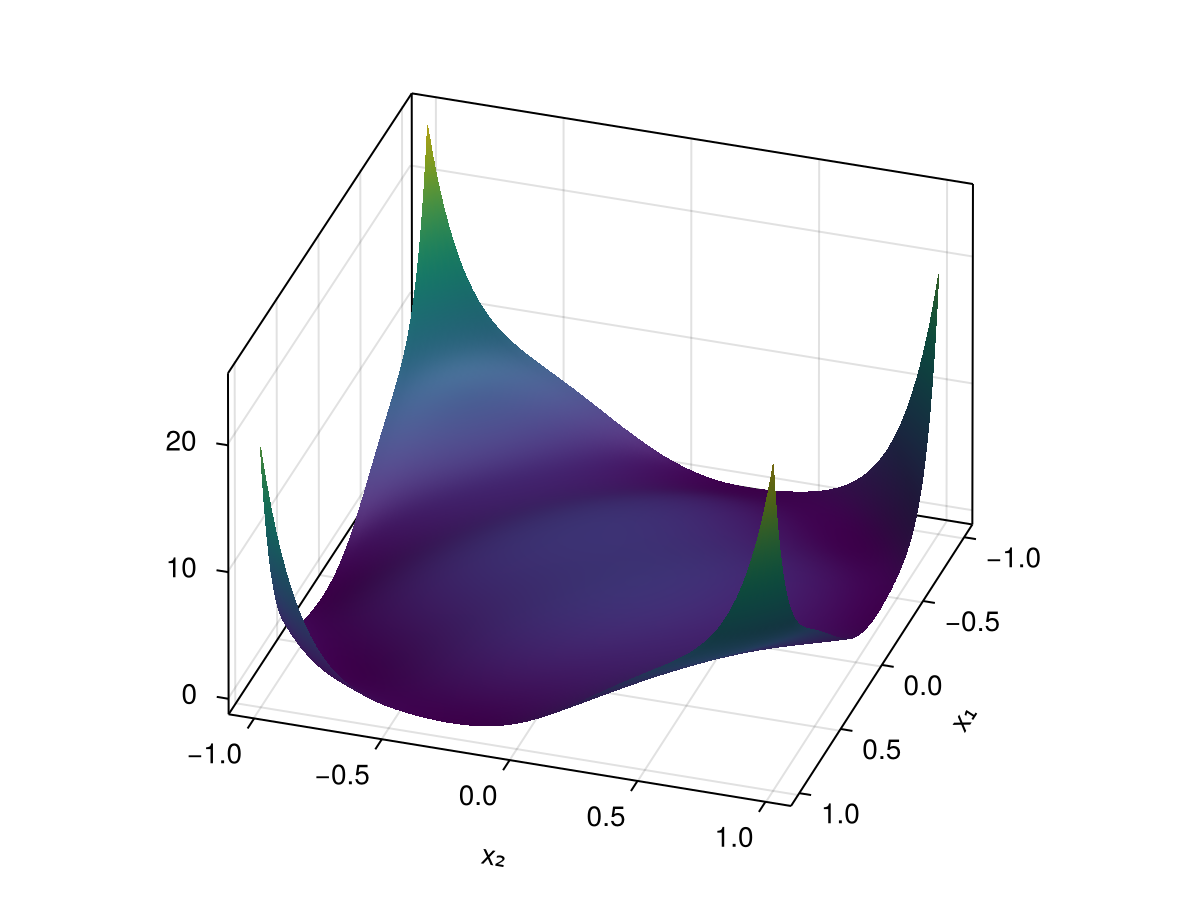

CairoMakie.Screen{IMAGE}


In [22]:
fig_3 = Figure()
ax = Axis3(fig_3[1, 1], xlabel="x₁", ylabel="x₂", zlabel="", azimuth=0.1π, elevation=π / 6)
surface!(ax, x1_range, x2_range, z1)
display(fig_3)
